### Kaggle Competition: House Prices: Advanced Regression Techniques

In [3]:
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from statsmodels.distributions.empirical_distribution import ECDF
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
rawTrain = pd.read_csv('/home/yichu/Downloads/HousePrice/train.csv')
rawTest = pd.read_csv('/home/yichu/Downloads/HousePrice/test.csv')
sampleSub = pd.read_csv('/home/yichu/Downloads/HousePrice/sample_submission.csv')

#### Analyze Data

In [5]:
rawTrain.shape

(1460, 81)

In [6]:
train = rawTrain.copy()
test = rawTest.copy()

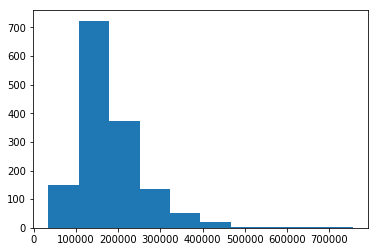

In [7]:
# distribution of y
_,_,_ = plt.hist(train.SalePrice)

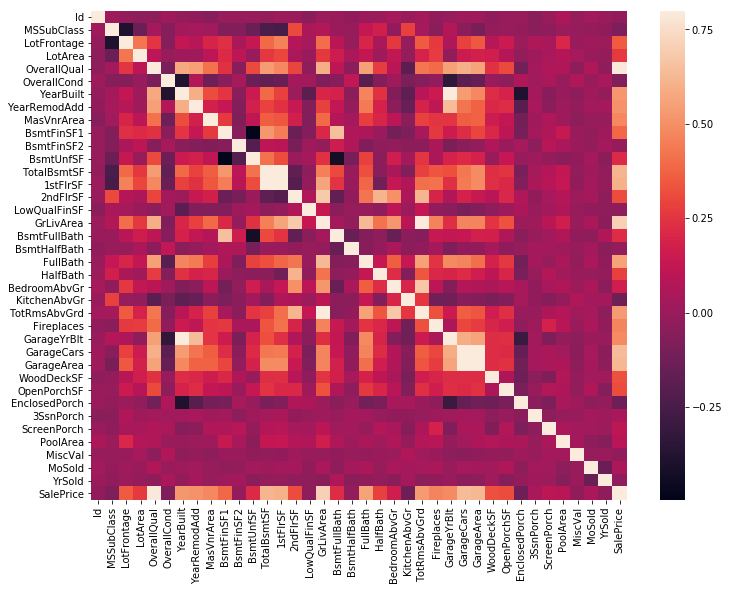

In [8]:
# correlation heatmap plot
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12,9))
sb.heatmap(corrmat, vmax=0.8)

In [9]:
# variables with highest correlation
k = 11
k_largest = corrmat.nlargest(11, 'SalePrice').index
k_largest

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

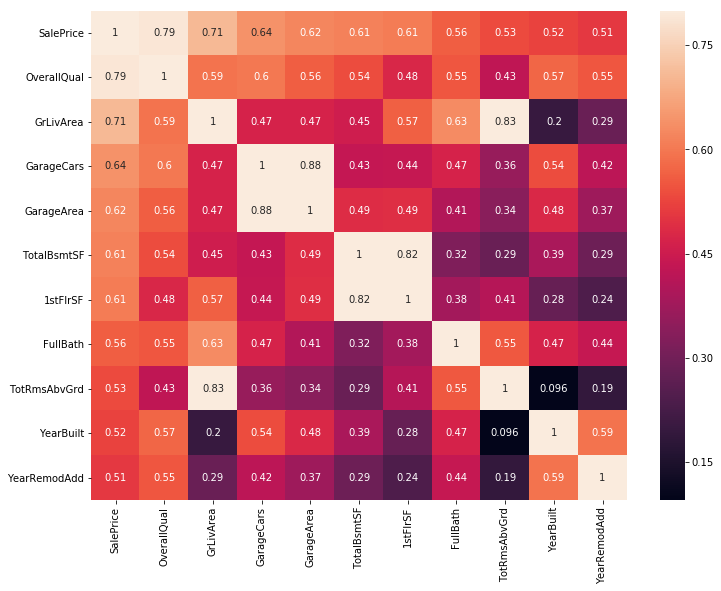

In [10]:
corrmat_k_largest = train[k_largest].corr()
f, ax = plt.subplots(figsize=(12,9))
sb.heatmap(corrmat_k_largest, vmax=0.8,annot=True)

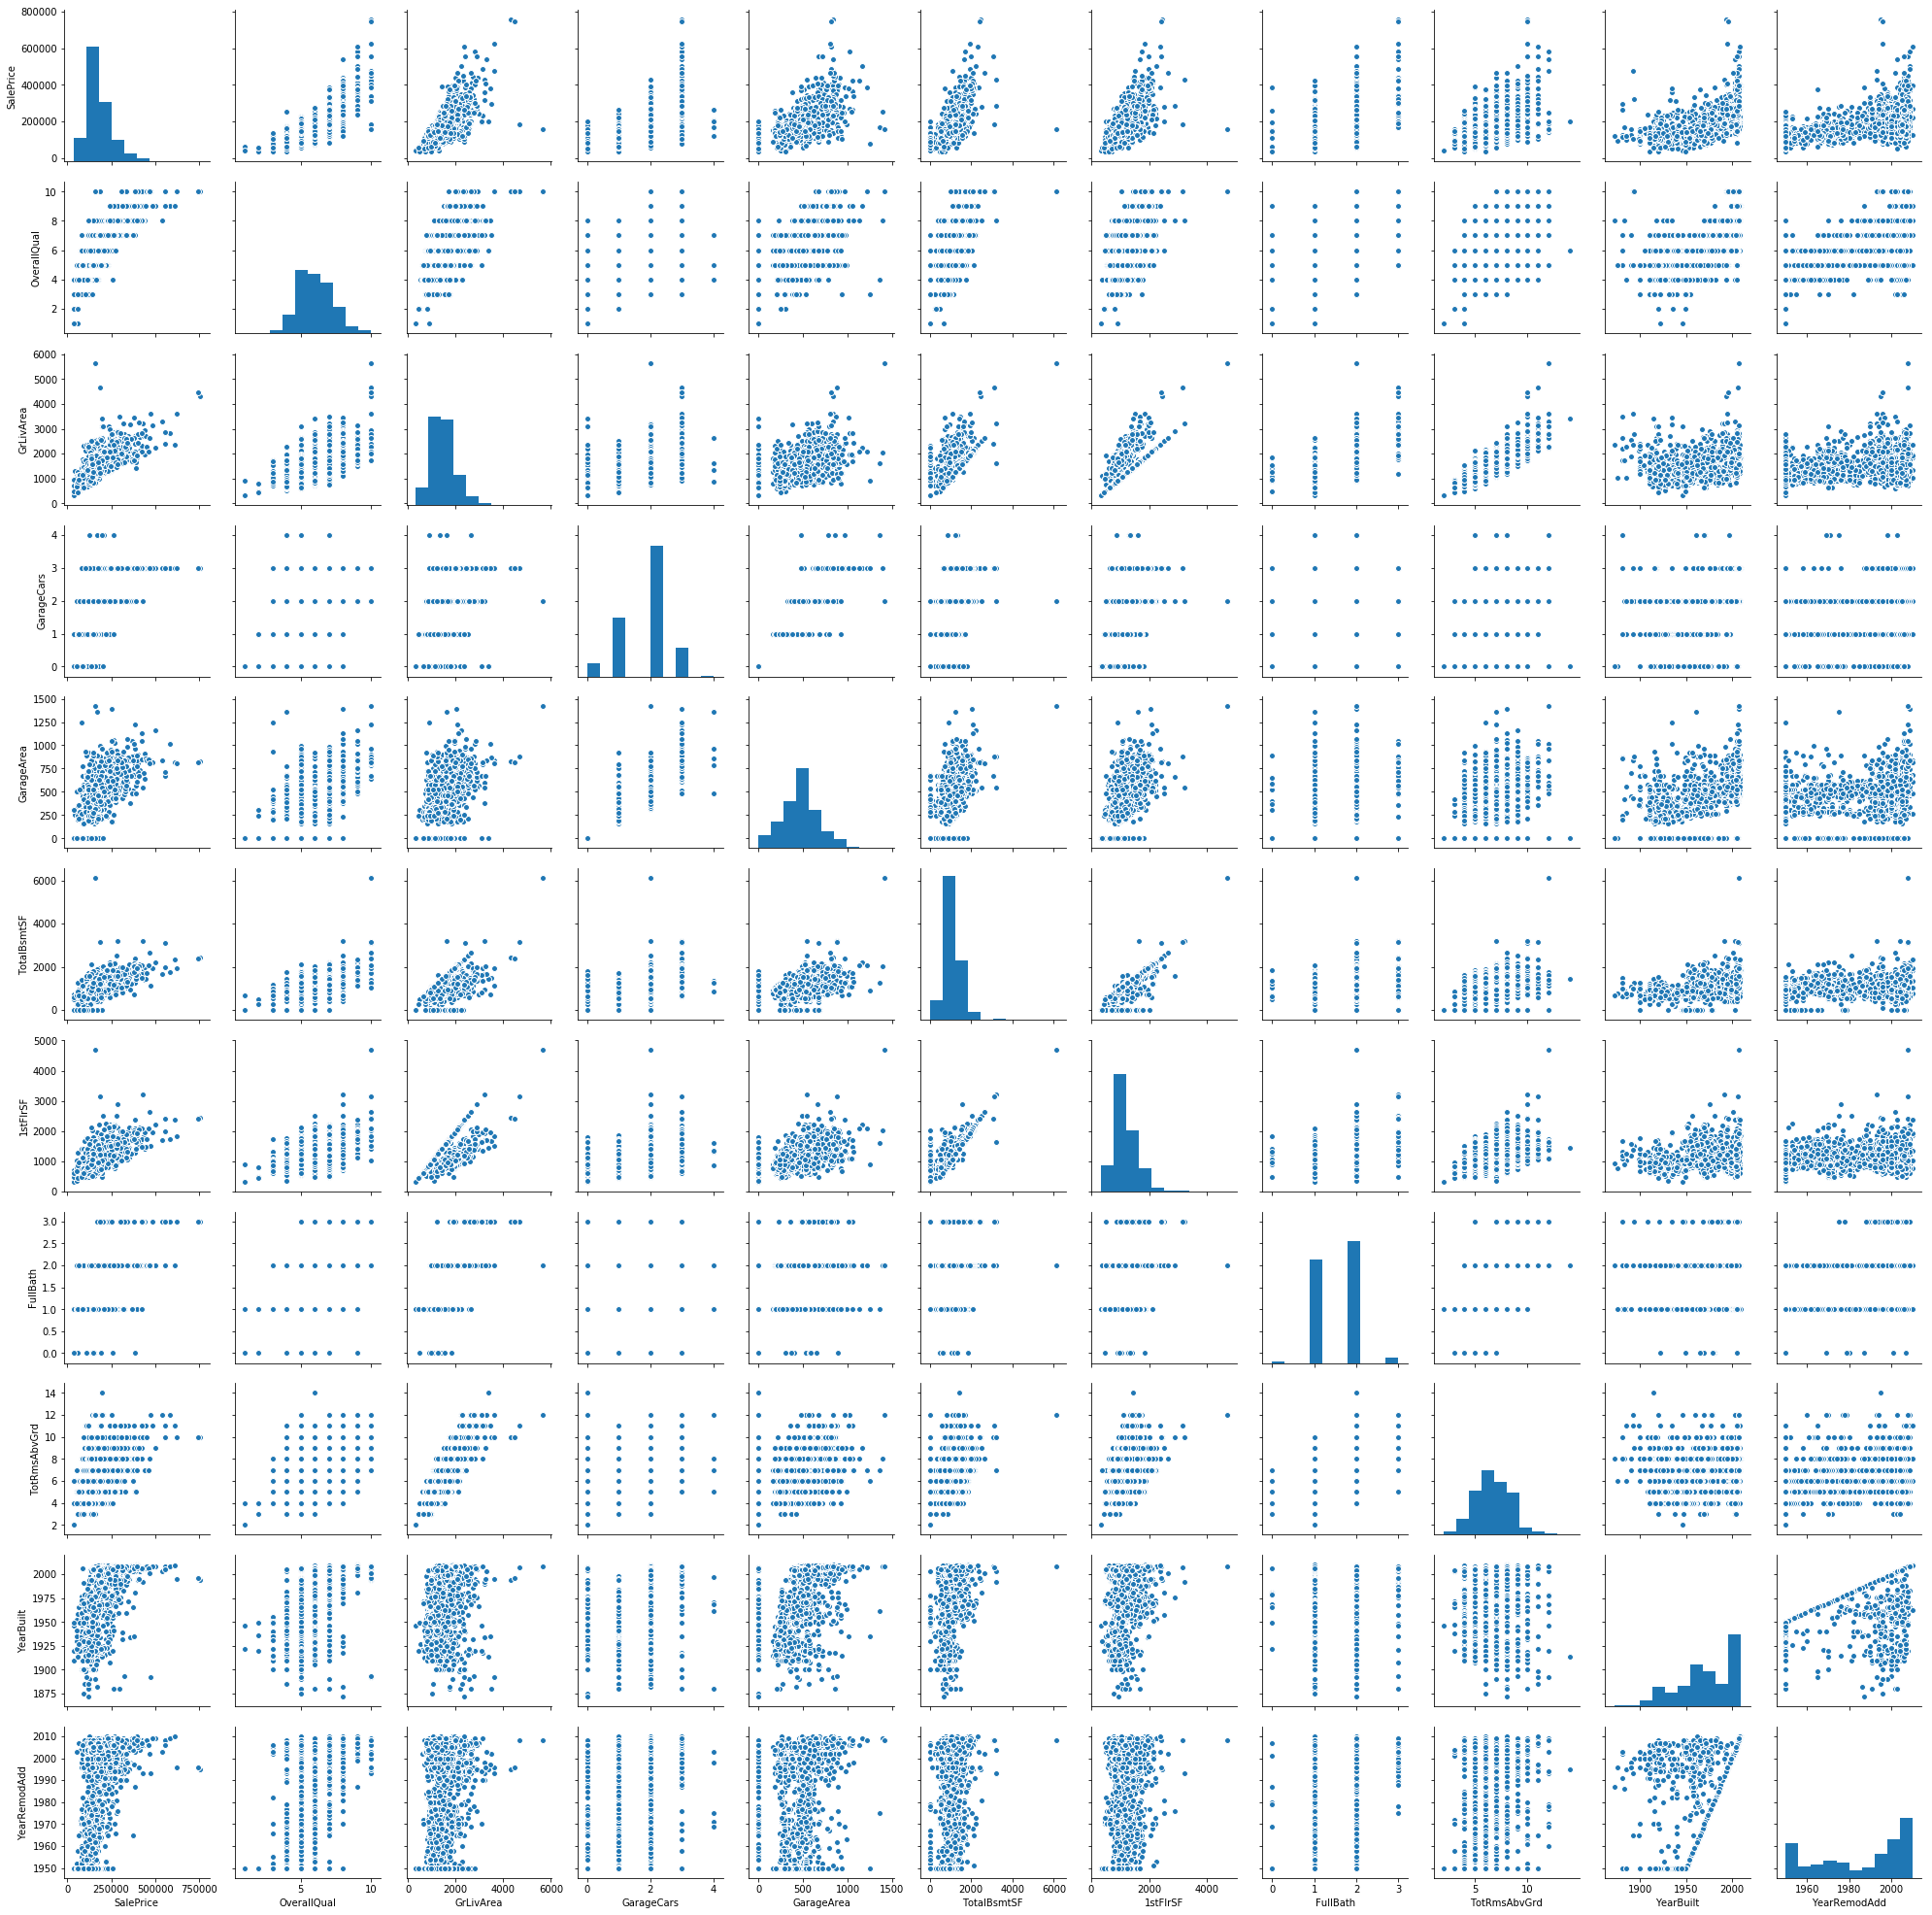

In [11]:
sb.pairplot(train[k_largest])

In [12]:
# missing data
missing = pd.DataFrame({'missing_cnt_train':train.isnull().sum(axis=0), 
                        'missing_pct_train':train.isnull().sum(axis=0)/train.shape[0],
                        'missing_cnt_test':test.isnull().sum(axis=0), 
                        'missing_pct_test':test.isnull().sum(axis=0)/test.shape[0]})
missing.sort_values(by='missing_pct_test', ascending=False, inplace=True)
missing

,missing_cnt_test,missing_cnt_train,missing_pct_test,missing_pct_train
PoolQC,1456.0,1453,0.997944,0.995205
MiscFeature,1408.0,1406,0.965045,0.963014
Alley,1352.0,1369,0.926662,0.937671
Fence,1169.0,1179,0.801234,0.807534
FireplaceQu,730.0,690,0.500343,0.472603
LotFrontage,227.0,259,0.155586,0.177397
GarageQual,78.0,81,0.053461,0.055479
GarageFinish,78.0,81,0.053461,0.055479
GarageCond,78.0,81,0.053461,0.055479
GarageYrBlt,78.0,81,0.053461,0.055479


#### Model 1: LS linear regression

In [5]:
chosen_var = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
trainX = train[chosen_var]
trainY = train['SalePrice']
testX = test[chosen_var]

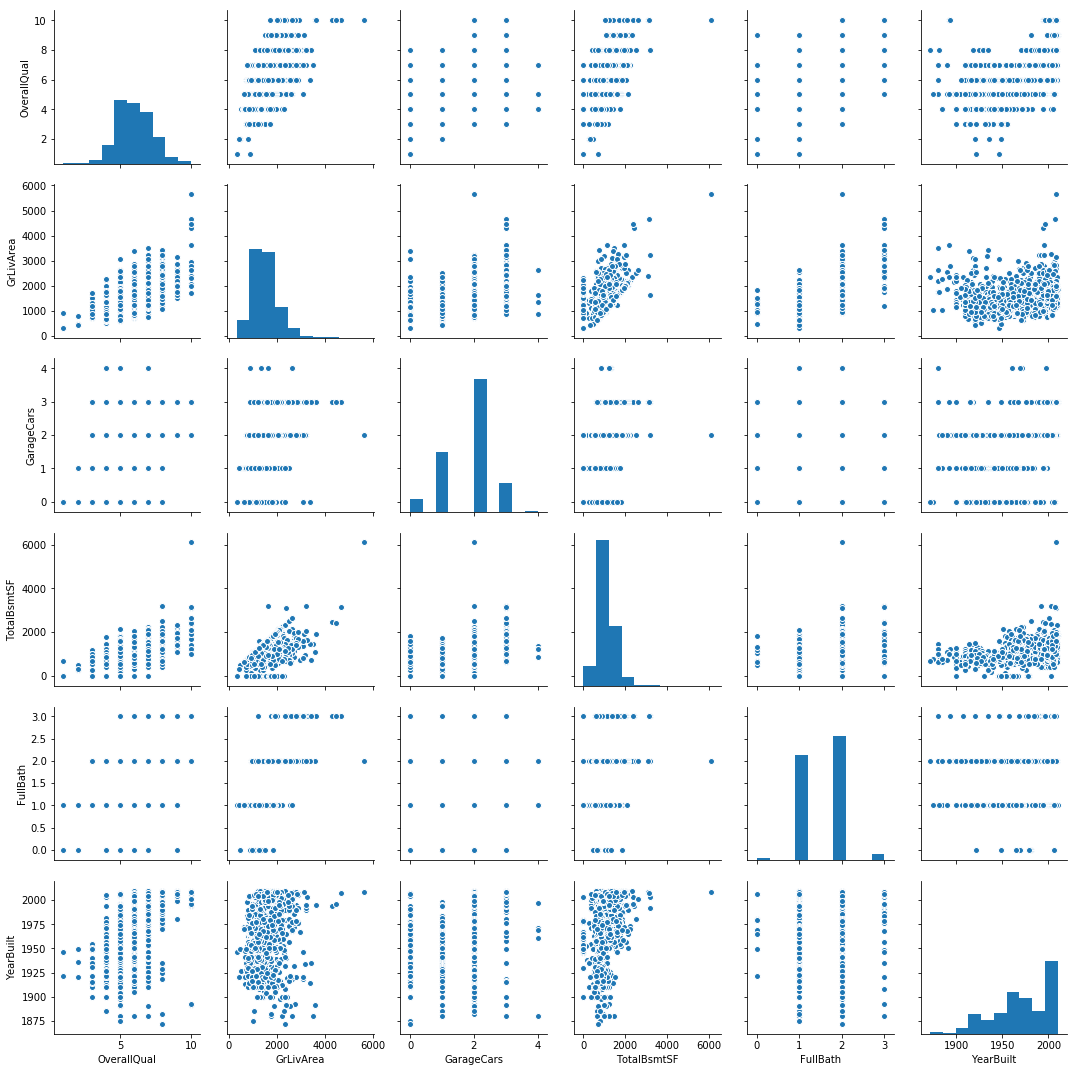

In [59]:
sb.pairplot(trainX)

Coefficients:
 [ 0.10306381  0.00024442  0.08793875  0.00012252 -0.00750271  0.00240763]
MSE: 2211028822.28
R2: 0.65


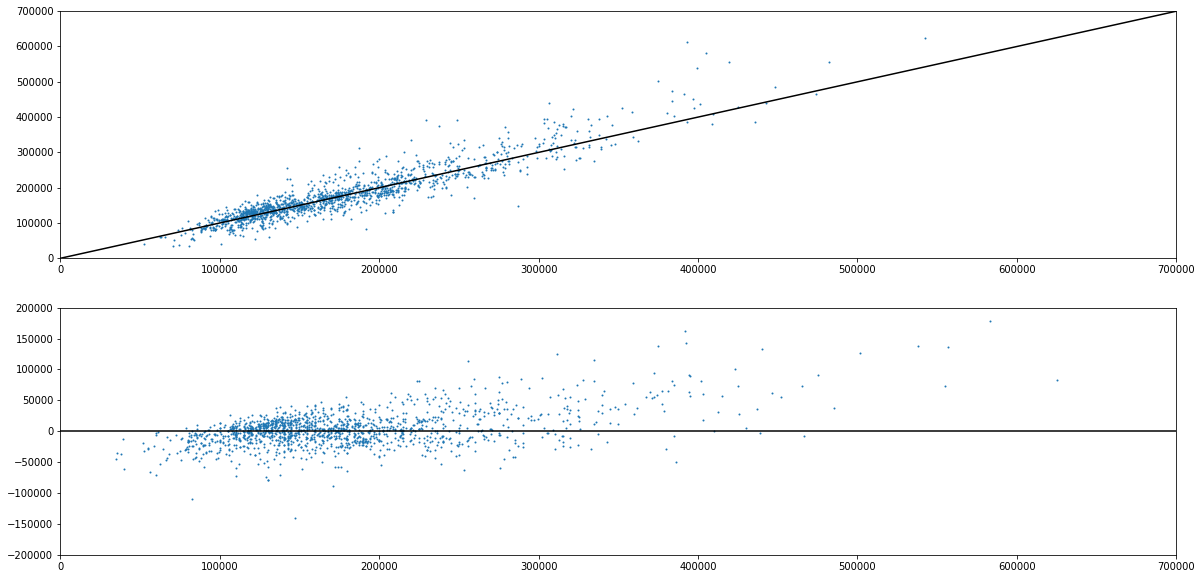

In [40]:
reg = linear_model.LinearRegression()
reg.fit(trainX, np.log(trainY))
print ("Coefficients:\n", reg.coef_)
trainYHat = np.exp(reg.predict(trainX))
print ("MSE: %.2f" % mean_squared_error(trainY, trainYHat))
print ("R2: %.2f" % r2_score(trainY, trainYHat))

plt.subplots(figsize=(20,10))
ax = plt.subplot(2,1,1)
ax.scatter(y=trainY, x=trainYHat, s=1)
ax.set_xlim([0,700000])
ax.set_ylim([0,700000])
ax.plot([0,1420000],[0,1420000],'k-')

ax = plt.subplot(2,1,2)
ax.scatter(y=trainY-trainYHat, x=trainY, s=1)
ax.set_xlim([0,700000])
ax.set_ylim([-200000,200000])
ax.plot([0,1420000],[0,0],'k-')

In [104]:
print (testX[testX.isnull().any(axis=1)])
testX_filled = testX.fillna(value={'GarageCars': testX.GarageCars.mean(), 'TotalBsmtSF': testX.TotalBsmtSF.mean()})

      OverallQual  GrLivArea  GarageCars  TotalBsmtSF  FullBath  YearBuilt
660             4        896         1.0          NaN         1       1946
1116            5       1828         NaN        859.0         2       1923


In [92]:
# output
outputDict = {"Id": rawTest.Id.values, 'SalePrice': np.exp(reg.predict(testX_filled).reshape(-1))}
outputDF = pd.DataFrame(outputDict)
outputDF.to_csv('output2.csv', index=False)
outputDF.head()

,Id,SalePrice
0,1461,114680.720640
1,1462,148204.591732
2,1463,163050.134550
3,1464,180039.027261
4,1465,210405.486295


#### Model 2: Robust regression

In [41]:
chosen_var = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
trainX = train[chosen_var]
trainY = train['SalePrice']
testX = test[chosen_var]

Coefficients:
 [ 0.05342381  0.00031663  0.02026896  0.00017819 -0.0030943   0.00558217]
MSE: 4633729206.40
R2: 0.27


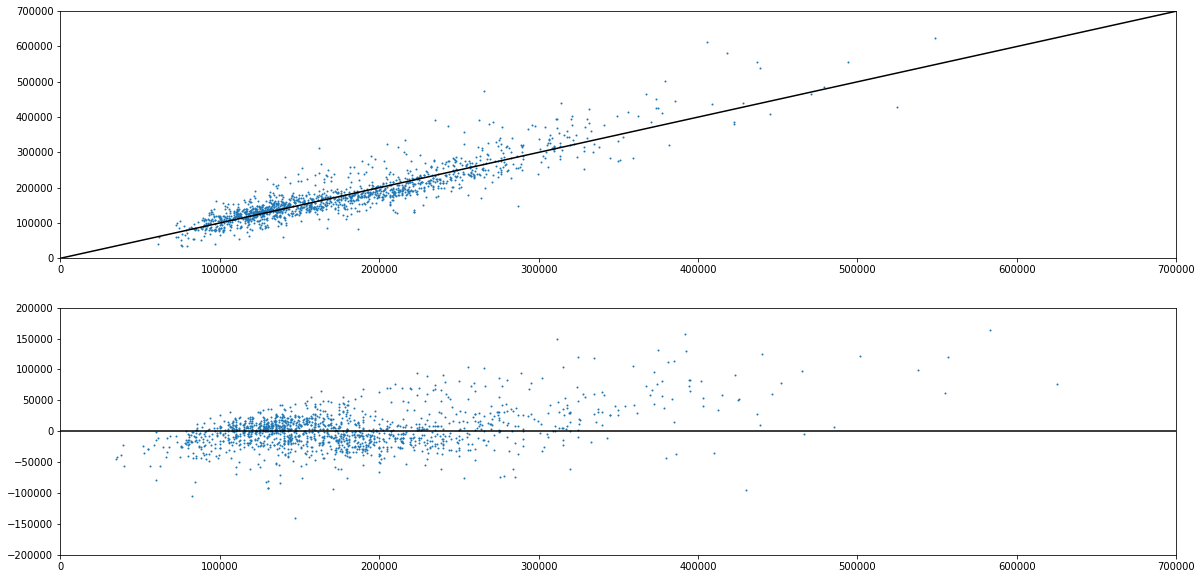

In [45]:
reg = linear_model.HuberRegressor(epsilon=1.0, alpha=0)
reg.fit(trainX, np.log(trainY))
print ("Coefficients:\n", reg.coef_)
trainYHat = np.exp(reg.predict(trainX))
print ("MSE: %.2f" % mean_squared_error(trainY, trainYHat))
print ("R2: %.2f" % r2_score(trainY, trainYHat))

plt.subplots(figsize=(20,10))
ax = plt.subplot(2,1,1)
ax.scatter(y=trainY, x=trainYHat, s=1)
ax.set_xlim([0,700000])
ax.set_ylim([0,700000])
ax.plot([0,1420000],[0,1420000],'k-')

ax = plt.subplot(2,1,2)
ax.scatter(y=trainY-trainYHat, x=trainY, s=1)
ax.set_xlim([0,700000])
ax.set_ylim([-200000,200000])
ax.plot([0,1420000],[0,0],'k-')

In [46]:
print (testX[testX.isnull().any(axis=1)])
testX_filled = testX.fillna(value={'GarageCars': testX.GarageCars.mean(), 'TotalBsmtSF': testX.TotalBsmtSF.mean()})

      OverallQual  GrLivArea  GarageCars  TotalBsmtSF  FullBath  YearBuilt
660             4        896         1.0          NaN         1       1946
1116            5       1828         NaN        859.0         2       1923


In [47]:
# output
outputDict = {"Id": rawTest.Id.values, 'SalePrice': np.exp(reg.predict(testX_filled).reshape(-1))}
outputDF = pd.DataFrame(outputDict)
outputDF.to_csv('output3.csv', index=False)
outputDF.head()

,Id,SalePrice
0,1461,117239.362347
1,1462,151055.336656
2,1463,185422.194084
3,1464,195072.104607
4,1465,201787.685359


#### Model 3: Random Forest

In [50]:
missing

,missing_cnt_test,missing_cnt_train,missing_pct_test,missing_pct_train
PoolQC,1456.0,1453,0.997944,0.995205
MiscFeature,1408.0,1406,0.965045,0.963014
Alley,1352.0,1369,0.926662,0.937671
Fence,1169.0,1179,0.801234,0.807534
FireplaceQu,730.0,690,0.500343,0.472603
LotFrontage,227.0,259,0.155586,0.177397
GarageQual,78.0,81,0.053461,0.055479
GarageFinish,78.0,81,0.053461,0.055479
GarageCond,78.0,81,0.053461,0.055479
GarageYrBlt,78.0,81,0.053461,0.055479


In [118]:
missingCol = missing[missing[['missing_cnt_test', 'missing_cnt_train']].sum(axis=1)>0].index.tolist()
trainX = rawTrain[[col for col in rawTrain.columns if col not in (['Id', 'SalePrice']+missingCol)]]
testX = rawTest[[col for col in rawTest.columns if col not in (['Id', 'SalePrice']+missingCol)]]
trainY = train['SalePrice'].values
print (trainX.shape)
print (testX.shape)

X = pd.concat([trainX, testX], axis=0)
X = pd.get_dummies(X)
trainX = X.iloc[0:trainX.shape[0]]
testX = X.iloc[trainX.shape[0]:]

print (trainX.shape)
print (testX.shape)

(1460, 45)
(1459, 45)
(1460, 149)
(1459, 149)


In [105]:
clf = RandomForestRegressor()

In [106]:
param_dist = {"max_depth": [10,15,20,25],
              "max_features": [10,15,20],
              "n_estimators": [100,200,400]
             }

In [107]:
grid_search = GridSearchCV(clf, param_dist)
grid_search.fit(trainX, trainY.values.reshape(-1))

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [10, 15, 20, 25], 'n_estimators': [100, 200, 400], 'max_features': [10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [86]:
def report(results, n_top=3):
    for i in range(1, n_top+1):
        candidates = np.flatnonzero(results['rank_test_score']==i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f}(std:{1:.3f})".format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            print("Parameters:{0}".format(results['params'][candidate]))
            print("")

In [108]:
report(grid_search.cv_results_, 5)

Model with rank: 1
Mean validation score: 0.847(std:0.016)
Parameters:{'max_depth': 15, 'n_estimators': 100, 'max_features': 20}

Model with rank: 2
Mean validation score: 0.847(std:0.020)
Parameters:{'max_depth': 25, 'n_estimators': 200, 'max_features': 20}

Model with rank: 3
Mean validation score: 0.846(std:0.024)
Parameters:{'max_depth': 20, 'n_estimators': 400, 'max_features': 20}

Model with rank: 4
Mean validation score: 0.846(std:0.021)
Parameters:{'max_depth': 25, 'n_estimators': 400, 'max_features': 20}

Model with rank: 5
Mean validation score: 0.845(std:0.022)
Parameters:{'max_depth': 20, 'n_estimators': 200, 'max_features': 20}



MSE: 134813390.83
R2: 0.98


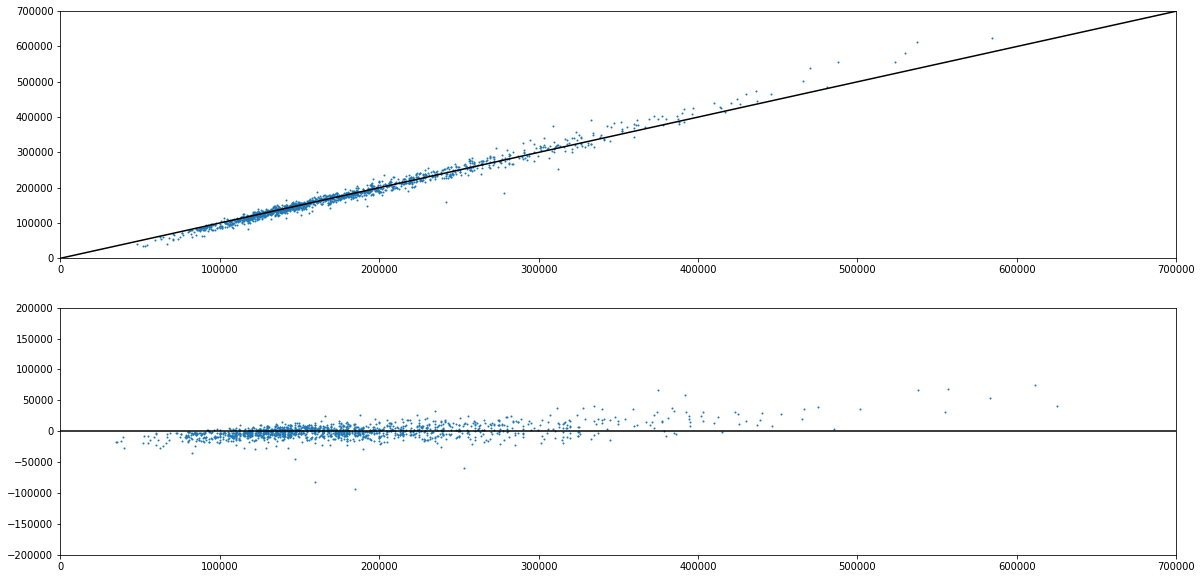

In [122]:
clf = RandomForestRegressor(n_estimators=100, max_depth=15, max_features=20)
clf.fit(trainX, trainY)
trainYHat = clf.predict(trainX)
r2_score(trainY, trainYHat)

print ("MSE: %.2f" % mean_squared_error(trainY, trainYHat))
print ("R2: %.2f" % r2_score(trainY, trainYHat))

plt.subplots(figsize=(20,10))
ax = plt.subplot(2,1,1)
ax.scatter(y=trainY, x=trainYHat, s=1)
ax.set_xlim([0,700000])
ax.set_ylim([0,700000])
ax.plot([0,1420000],[0,1420000],'k-')

ax = plt.subplot(2,1,2)
ax.scatter(y=trainY-trainYHat, x=trainY, s=1)
ax.set_xlim([0,700000])
ax.set_ylim([-200000,200000])
ax.plot([0,1420000],[0,0],'k-')

In [123]:
testY = clf.predict(testX)

In [124]:
# output
outputDict = {"Id": rawTest.Id.values, 'SalePrice': testY.reshape(-1)}
outputDF = pd.DataFrame(outputDict)
outputDF.to_csv('output5.csv', index=False)
outputDF.head()

,Id,SalePrice
0,1461,126953.136296
1,1462,154298.778665
2,1463,177147.463626
3,1464,185164.859204
4,1465,210185.461619


#### Model 4: Random Forest, missing value handling

##### Impute missing value using k-nearest neighbors https://medium.com/airbnb-engineering/overcoming-missing-values-in-a-random-forest-classifier-7b1fc1fc03ba

In [13]:
missing

,missing_cnt_test,missing_cnt_train,missing_pct_test,missing_pct_train
PoolQC,1456.0,1453,0.997944,0.995205
MiscFeature,1408.0,1406,0.965045,0.963014
Alley,1352.0,1369,0.926662,0.937671
Fence,1169.0,1179,0.801234,0.807534
FireplaceQu,730.0,690,0.500343,0.472603
LotFrontage,227.0,259,0.155586,0.177397
GarageQual,78.0,81,0.053461,0.055479
GarageFinish,78.0,81,0.053461,0.055479
GarageCond,78.0,81,0.053461,0.055479
GarageYrBlt,78.0,81,0.053461,0.055479


In [61]:
trainX = rawTrain[[col for col in rawTrain.columns if col not in (['Id', 'SalePrice'])]]
testX = rawTest[[col for col in rawTest.columns if col not in (['Id', 'SalePrice'])]]
trainY = train['SalePrice'].values
print (trainX.shape)
print (testX.shape)

X = pd.concat([trainX, testX], axis=0)

(1460, 79)
(1459, 79)


In [62]:
missingCols = missing[missing[['missing_cnt_test', 'missing_cnt_train']].sum(axis=1)>0].index.tolist()

In [91]:
def ECDF_map(ar): # map numerical value to empirical cdf, preserving NaN value
    cdf = ar.copy()
    dis = ECDF(ar[np.logical_not(ar.isnull())])
    cdf[np.logical_not(ar.isnull())] = dis(ar[np.logical_not(ar.isnull())])
    return cdf

In [92]:
numCols = X.columns[(X.dtypes!=object)] # numerical columns
print ("number of numerical columns %d" % len(numCols))
a = X[numCols].apply(ECDF_map)
print ("shape of transformed numerical value")
print (a.shape)

number of numerical columns 36
shape of transformed numerical value
(2919, 36)
